<h3>Visualisation with Seaborn</h3>

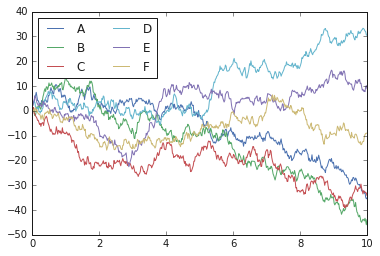

In [5]:
# example of Matplotlib way of formating a plot
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

# creating some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500,6), 0) # for each of 500 rows there is a sum of 6 
# numbers from normal distribution(-2.7:2.7)

# plotting with Matplotlib defaults looks a bit old-fashioned
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

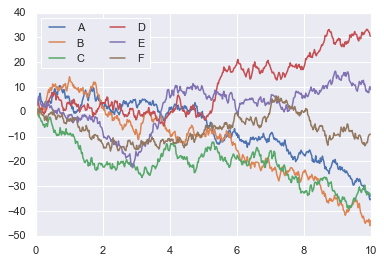

In [6]:
# the same with Seaborn, which can also overwrite Matplotlib's default parameters
import seaborn as sns
sns.set()  # setting the Seaborn style

# same plotting code as above
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

<h4>Exploring Seaborn Plots</h4>

<h5>Histograms, KDE and densities</h5>

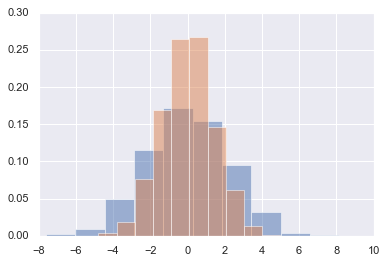

In [7]:
# histogram made with Matplotlib
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)
plt.show();

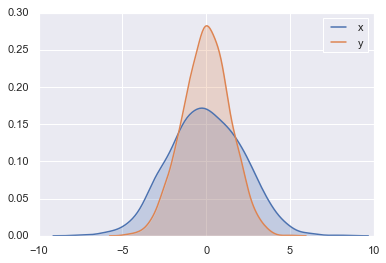

In [8]:
# rather than histogram like above plot Seaborn estimates distribution using kernel density
for col in 'xy':
    sns.kdeplot(data[col], shade=True)
plt.show();

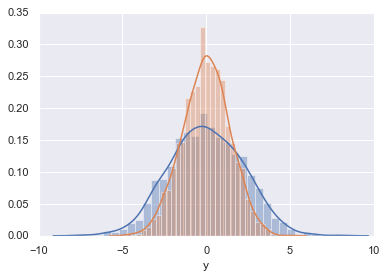

In [9]:
# histograms and KDE can be combined using distplot() function
sns.distplot(data['x'])
sns.distplot(data['y']);

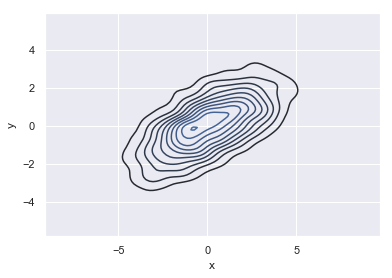

In [10]:
# two-dimensional visualization by using 2-dimensional dataset with kdeplot()
#sns.set_palette(palette)
sns.kdeplot(data['x'],data['y']);

##### Joint plots

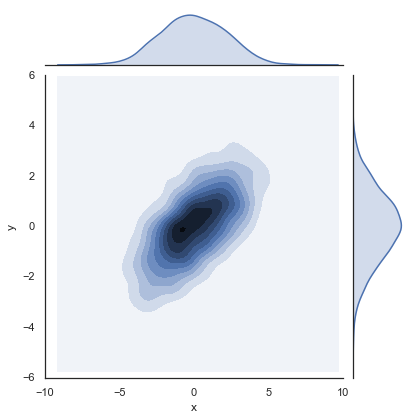

In [11]:
# joint distribution and marginal distribution together by using jointplot()
# jointplot() is useful with smaller data
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='kde')
plt.show();

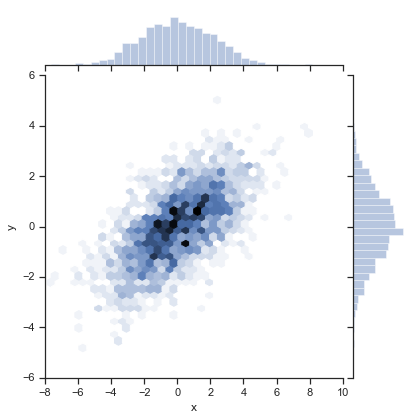

In [12]:
# hexagonnaly based histogram by using other parameters
with sns.axes_style('ticks'):
    sns.jointplot('x', 'y', data, kind='hex')
plt.show();

##### Pair plots

In [13]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


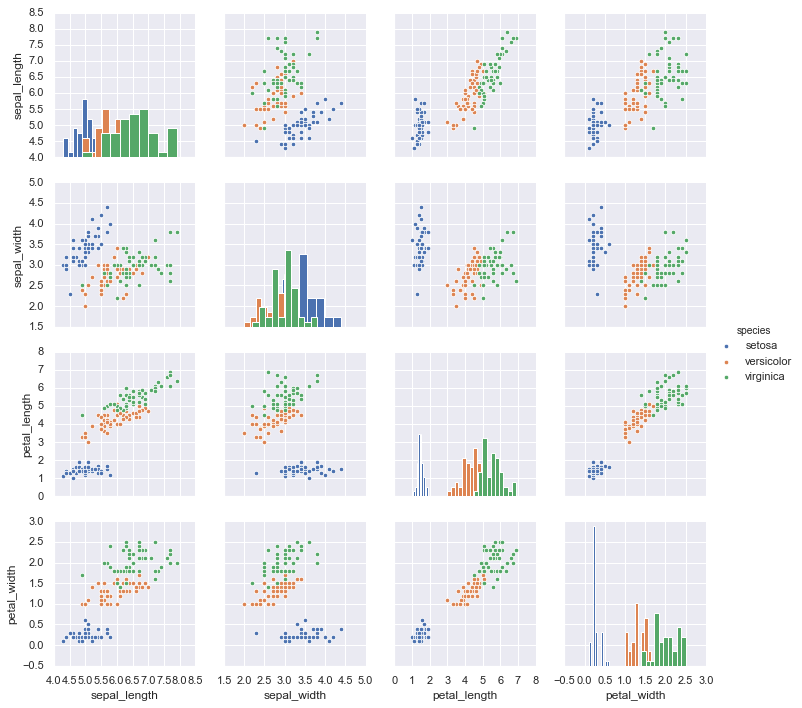

In [14]:
# while hue is used diagonal subplots are 'kde' kind, to change it 'diag_kind' is needed
sns.pairplot(iris, hue='species', diag_kind='hist', height=2.5);

##### Faceted histograms

In [15]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


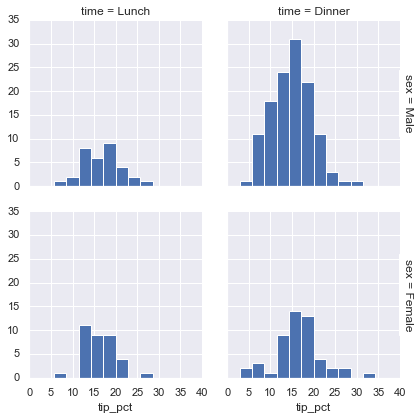

In [16]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 15));

##### Factor plots

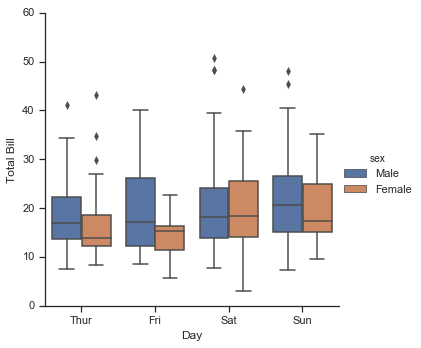

In [17]:
# viewing the distribution of a parameter within bins defined by any other parameter
with sns.axes_style(style='ticks'):
    g = sns.catplot('day', 'total_bill', 'sex', data=tips, kind='box')
    g.set_axis_labels('Day', 'Total Bill')
plt.show();

##### Joint distributions

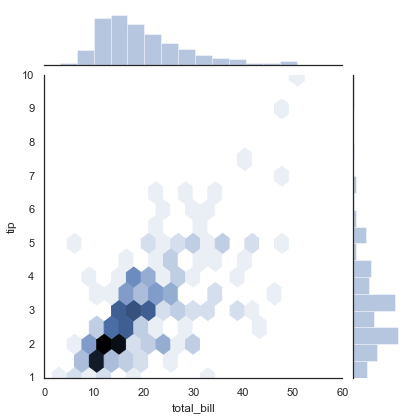

In [18]:
with sns.axes_style('white'):
    sns.jointplot('total_bill', 'tip', data=tips, kind='hex');

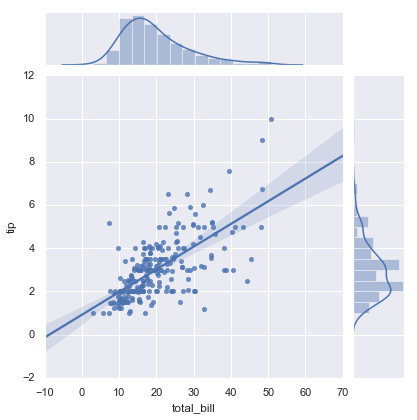

In [19]:
# with kernel density estimation(kde) and regression
sns.jointplot('total_bill', 'tip', data=tips, kind='reg');

##### Bar plots

In [21]:
planets = sns.load_dataset('planets')
planets.head()
planets.shape

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


(1035, 6)

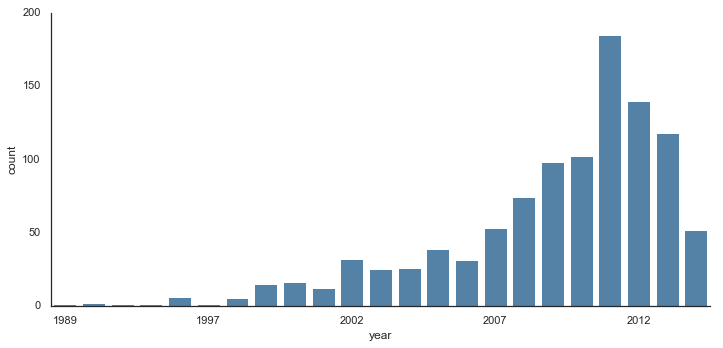

In [23]:
with sns.axes_style('white'):
    g = sns.catplot('year', data=planets, aspect=2,
                   kind='count', color='steelblue')
    g.set_xticklabels(step=5)
plt.show();

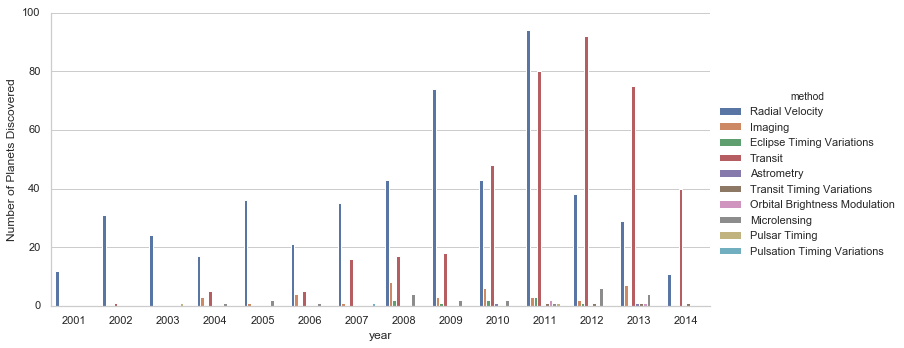

In [40]:
with sns.axes_style('whitegrid'):
    g = sns.catplot('year', data=planets, aspect=2, kind='count',
                   hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')
plt.show();

In [41]:
planets.method.value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

#### The end